# Inspection Benchmarking

In this study we wish to check the AI's ability to check the validity of the data and determine if the experiment has succeeded or not.

We generate 100 figures with synthetic data for each experiment. 100 success and different types of failure.

We report the correctness with 1: only fitting 2: only vision model 3: vision model + fitting

In [1]:
import leeq
import json
from simulated_setup import * # Change to your customized setup file
import numpy as np
from scipy import optimize as so
from leeq.experiments.builtin import *
import plotly.graph_objects as go
from labchronicle import log_and_record, register_browser_function

from leeq.utils.compatibility import *
from leeq.core.elements.built_in.qudit_transmon import TransmonElement
from leeq.experiments.builtin import *
from pprint import pprint

In [2]:

dut_dict = {
    'Q1': {'Active': True, 'Tuneup': False,'FromLog':False, 'Params': configuration_a},
    'Q2': {'Active': True, 'Tuneup': False,'FromLog':False, 'Params': configuration_b}
} 


In [3]:
duts_dict = {}
for hrid, dd in dut_dict.items():
    if (dd['Active']):
        if (dd['FromLog']):
            dut = TransmonElement.load_from_calibration_log(dd['Params']['hrid'])
        else:
            dut = TransmonElement(name=dd['Params']['hrid'],parameters=dd['Params'])
            
        dut.print_config_info()
        duts_dict[hrid] = dut

dut = None

<IPython.core.display.JSON object>

<IPython.core.display.JSON object>

In [4]:
num_samples = 2 

## DRAG

In [5]:
def run_benchmark(scan_params):
    dut = duts_dict['Q1']  
    res = DragCalibrationSingleQubitMultilevel(dut=dut,**scan_params)
    return extract_results_from_experiment(res)

[2024-07-20 15:45:59] [INFO] [labchronicle.chronicle] Log started at log/coxious/2024-07/2024-07-20/15.45.59
[2024-07-20 15:45:59] [INFO] [labchronicle.chronicle] Log started at log/coxious/2024-07/2024-07-20/15.45.59
INFO:labchronicle.chronicle:Log started at log/coxious/2024-07/2024-07-20/15.45.59


DragCalibrationSingleQubitMultilevel.run


<IPython.core.display.JSON object>

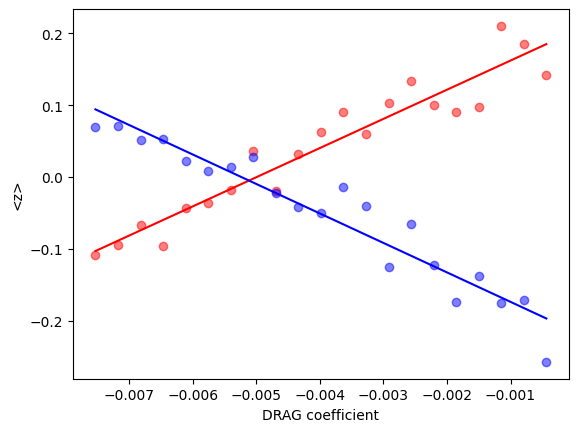

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[2024-07-20 15:46:10] [INFO] [labchronicle.chronicle] Log started at log/coxious/2024-07/2024-07-20/15.46.10
[2024-07-20 15:46:10] [INFO] [labchronicle.chronicle] Log started at log/coxious/2024-07/2024-07-20/15.46.10
INFO:labchronicle.chronicle:Log started at log/coxious/2024-07/2024-07-20/15.46.10


DragCalibrationSingleQubitMultilevel.run


<IPython.core.display.JSON object>

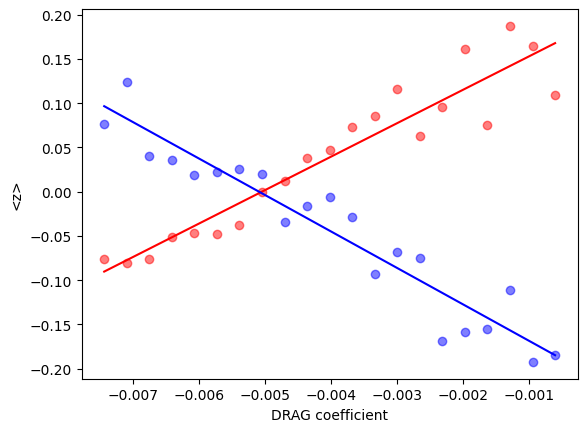

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

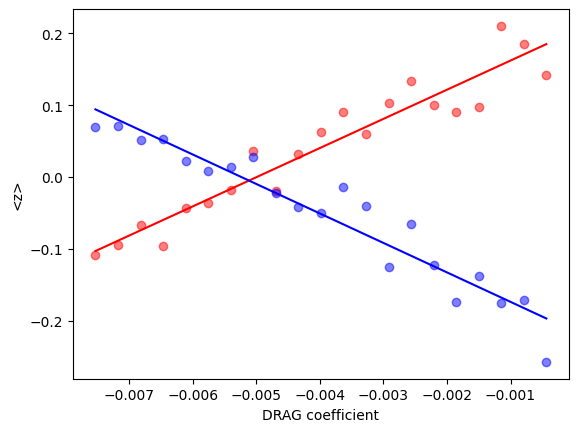

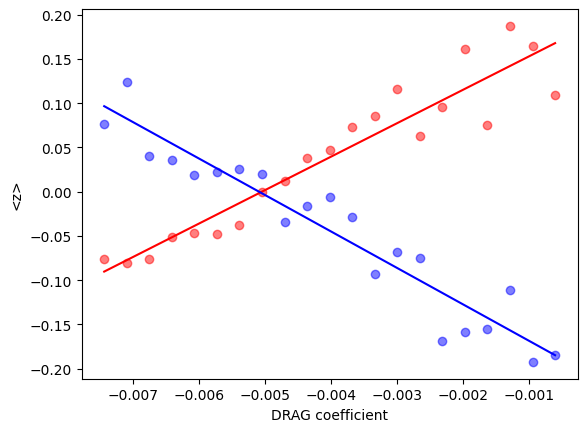

In [6]:
success_inspections = {}

for i in range(num_samples):
    np.random.seed(i)

    simulation_setup()
    setup().status().set_param("AIAutoInspectPlots", True)  
    ExperimentManager().status().set_parameter("Plot_Result_In_Jupyter",True)

    span_width = 0.006 + 0.002 * np.random.random(1)[0]
    center = -0.005 + span_width * 0.2 * np.random.random(1)[0]
    
    scan_params = {
        'inv_alpha_start':center - span_width/2 ,
        'inv_alpha_stop':center + span_width/2
    }
        
    result = run_benchmark(scan_params)

    success_inspections[i] = result
    with open('drag_success_cases.json', 'w') as f:
        json.dump(success_inspections, f)

[2024-07-20 15:46:30] [INFO] [labchronicle.chronicle] Log started at log/coxious/2024-07/2024-07-20/15.46.30
[2024-07-20 15:46:30] [INFO] [labchronicle.chronicle] Log started at log/coxious/2024-07/2024-07-20/15.46.30
INFO:labchronicle.chronicle:Log started at log/coxious/2024-07/2024-07-20/15.46.30


DragCalibrationSingleQubitMultilevel.run


<IPython.core.display.JSON object>

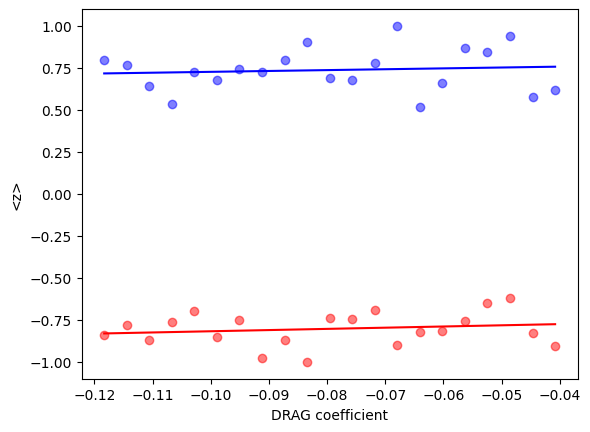

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[2024-07-20 15:46:54] [INFO] [labchronicle.chronicle] Log started at log/coxious/2024-07/2024-07-20/15.46.54
[2024-07-20 15:46:54] [INFO] [labchronicle.chronicle] Log started at log/coxious/2024-07/2024-07-20/15.46.54
INFO:labchronicle.chronicle:Log started at log/coxious/2024-07/2024-07-20/15.46.54


DragCalibrationSingleQubitMultilevel.run


<IPython.core.display.JSON object>

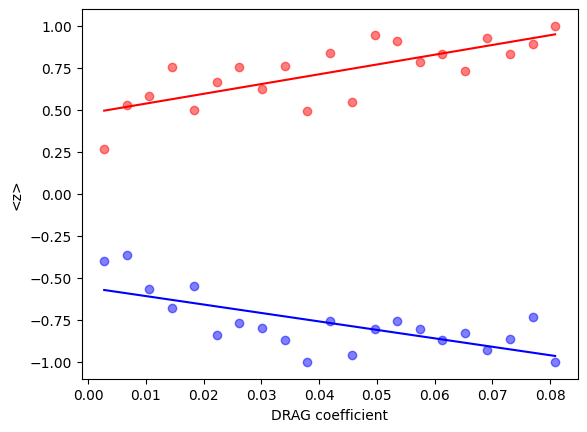

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

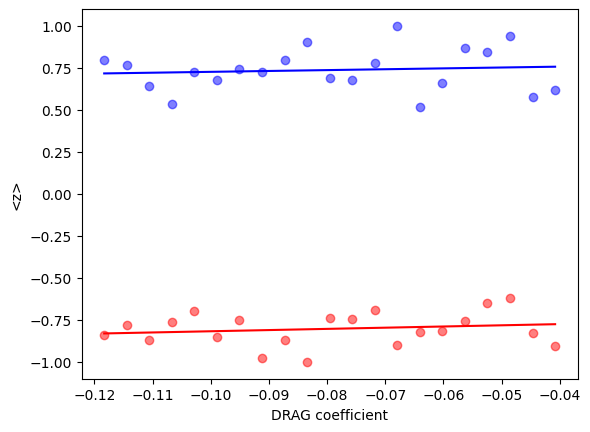

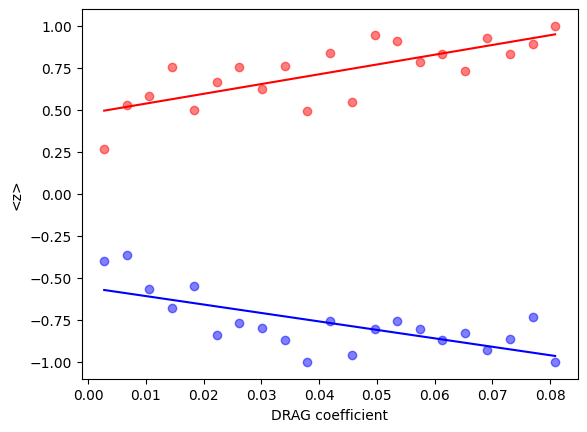

In [7]:
failed_inspections = {}


for i in range(num_samples):
    np.random.seed(i)

    simulation_setup()
    setup().status().set_param("AIAutoInspectPlots", True)  
    ExperimentManager().status().set_parameter("Plot_Result_In_Jupyter",True)

    sign = np.random.random(1)[0] > 0.5
    
    span_width = 0.006 + 0.1 * np.random.random(1)[0]
    center = -0.005 + (-1)**sign * span_width * 0.6 * (1+np.random.random(1)[0])
    
    scan_params = {
        'inv_alpha_start':center - span_width/2 ,
        'inv_alpha_stop':center + span_width/2
    }
        
    result = run_benchmark(scan_params)
    
    failed_inspections[i] = result
    with open('drag_failed_cases.json', 'w') as f:
        json.dump(failed_inspections, f)